<a href="https://colab.research.google.com/github/mfyuce/deep-learning-with-python-notebooks/blob/master/chapter08_image-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Third Edition](https://www.manning.com/books/deep-learning-with-python-third-edition). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

The book's contents are available online at [deeplearningwithpython.io](https://deeplearningwithpython.io).

In [2]:
!pip install keras keras-hub --upgrade -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-nlp 0.21.1 requires keras-hub==0.21.1, but you have keras-hub 0.26.0 which is incompatible.


In [3]:
import os
os.environ["KERAS_BACKEND"] = "jax"

In [4]:
# @title
import os
from IPython.core.magic import register_cell_magic

@register_cell_magic
def backend(line, cell):
    current, required = os.environ.get("KERAS_BACKEND", ""), line.split()[-1]
    if current == required:
        get_ipython().run_cell(cell)
    else:
        print(
            f"This cell requires the {required} backend. To run it, change KERAS_BACKEND to "
            f"\"{required}\" at the top of the notebook, restart the runtime, and rerun the notebook."
        )

## Image classification

### Introduction to ConvNets

In [5]:
import keras
from keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [6]:
model.summary(line_length=80)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)          │ (None, 28, 28, 1)        │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d (Conv2D)                   │ (None, 26, 26, 64)       │           640 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)      │ (None, 13, 13, 64)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)                 │ (None, 11, 11, 128)      │        73,856 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)    │ (None, 5, 5, 128)        │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)                 │ (None, 3, 3, 256)        │       295,168 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ global_average_pooling2d          │ (None, 256)              │             0 │
│ (GlobalAveragePooling2D)          │                          │               │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense (Dense)                     │ (None, 10)               │         2,570 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 372,234 (1.42 MB)

 Trainable params: 372,234 (1.42 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9232 - loss: 0.2476
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9774 - loss: 0.0714
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9847 - loss: 0.0485
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9883 - loss: 0.0366
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9914 - loss: 0.0281


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9892 - loss: 0.0317
Test accuracy: 0.989


#### The convolution operation

##### Understanding border effects and padding

##### Understanding convolution strides

#### The max-pooling operation

In [9]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
model_no_max_pool.summary(line_length=80)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)        │ (None, 28, 28, 1)        │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)                 │ (None, 26, 26, 64)       │           640 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)                 │ (None, 24, 24, 128)      │        73,856 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)                 │ (None, 22, 22, 256)      │       295,168 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ global_average_pooling2d_1        │ (None, 256)              │             0 │
│ (GlobalAveragePooling2D)          │                          │               │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_1 (Dense)                   │ (None, 10)               │         2,570 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 372,234 (1.42 MB)

 Trainable params: 372,234 (1.42 MB)

 Non-trainable params: 0 (0.00 B)

### Training a ConvNet from scratch on a small dataset

#### The relevance of deep learning for small-data problems

#### Downloading the data

In [11]:
#import kagglehub

#kagglehub.login()

In [12]:
#download_path = kagglehub.competition_download("dogs-vs-cats")

In [13]:
#import zipfile

#with zipfile.ZipFile(download_path + "/train.zip", "r") as zip_ref:
#    zip_ref.extractall(".")

In [14]:
from datasets import load_dataset
from PIL import Image
import os, pathlib
import numpy as np

# 1) HF dataset
ds = load_dataset("cats_vs_dogs")  # genelde {"train":..., "test":...}

# 2) Label -> klasör adı
# cats_vs_dogs'ta label genelde 0=cat, 1=dog
label_to_name = {0: "cat", 1: "dog"}

# 3) Notebook'un beklediği hedef klasör
new_base_dir = pathlib.Path("dogs_vs_cats_small")

# Temiz kurulum (varsa klasörü silmek istersen)
# import shutil
# if new_base_dir.exists():
#     shutil.rmtree(new_base_dir)

def ensure_dirs():
    for split in ["train", "validation", "test"]:
        for cls in ["cat", "dog"]:
            (new_base_dir / split / cls).mkdir(parents=True, exist_ok=True)

ensure_dirs()

# 4) HF'de tek bir "train" split varsa: train/val/test'e bölelim
# Not: Orijinal notebook 1000 train, 500 val, 1000 test kullanıyor (küçük dataset).
# Burada da benzer sayıları alacağız.
base = ds["train"]
n = len(base)

# karıştır
rng = np.random.default_rng(42)
indices = rng.permutation(n)

n_train = 1000
n_val = 500
n_test = 1000

train_idx = indices[:n_train]
val_idx   = indices[n_train:n_train+n_val]
test_idx  = indices[n_train+n_val:n_train+n_val+n_test]

def export_split(split_name, split_indices, start_counter=0):
    counter = start_counter
    for idx in split_indices:
        ex = base[int(idx)]
        img = ex["image"]  # genelde PIL.Image
        label = int(ex["labels"]) if "labels" in ex else int(ex["label"])
        cls = label_to_name[label]

        # notebook benzeri isimlendirme: cat.0.jpg / dog.0.jpg
        fname = f"{cls}.{counter}.jpg"
        out_path = new_base_dir / split_name / cls / fname

        # güvenli RGB kaydet
        if isinstance(img, Image.Image):
            img.convert("RGB").save(out_path, format="JPEG", quality=95)
        else:
            # bazı varyantlarda img dict/array gelebilir
            Image.fromarray(np.array(img)).convert("RGB").save(out_path, format="JPEG", quality=95)

        counter += 1
    return counter

c = 0
c = export_split("train", train_idx, start_counter=c)
c = export_split("validation", val_idx, start_counter=c)
c = export_split("test", test_idx, start_counter=c)

print("Done. Base dir:", new_base_dir.resolve())

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00002.parquet:   0%|          | 0.00/330M [00:00<?, ?B/s]

data/train-00001-of-00002.parquet:   0%|          | 0.00/391M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/23410 [00:00<?, ? examples/s]

Done. Base dir: /content/dogs_vs_cats_small


In [15]:
#import os, shutil, pathlib

#original_dir = pathlib.Path("train")
#new_base_dir = pathlib.Path("dogs_vs_cats_small")

#def make_subset(subset_name, start_index, end_index):
#    for category in ("cat", "dog"):
#        dir = new_base_dir / subset_name / category
#        os.makedirs(dir)
#        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
#        for fname in fnames:
#            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

#make_subset("train", start_index=0, end_index=1000)
#make_subset("validation", start_index=1000, end_index=1500)
#make_subset("test", start_index=1500, end_index=2500)

#### Building your model

In [16]:
import keras
from keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1.0 / 255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [17]:
model.summary(line_length=80)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)        │ (None, 180, 180, 3)      │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ rescaling (Rescaling)             │ (None, 180, 180, 3)      │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)                 │ (None, 178, 178, 32)     │           896 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)    │ (None, 89, 89, 32)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)                 │ (None, 87, 87, 64)       │        18,496 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)    │ (None, 43, 43, 64)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)                 │ (None, 41, 41, 128)      │        73,856 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)    │ (None, 20, 20, 128)      │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)                 │ (None, 18, 18, 256)      │       295,168 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)    │ (None, 9, 9, 256)        │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)                │ (None, 7, 7, 512)        │     1,180,160 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ global_average_pooling2d_2        │ (None, 512)              │             0 │
│ (GlobalAveragePooling2D)          │                          │               │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_2 (Dense)                   │ (None, 1)                │           513 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 1,569,089 (5.99 MB)

 Trainable params: 1,569,089 (5.99 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

#### Data preprocessing

In [19]:
from keras.utils import image_dataset_from_directory

batch_size = 64
image_size = (180, 180)
train_dataset = image_dataset_from_directory(
    new_base_dir / "train", image_size=image_size, batch_size=batch_size
)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation", image_size=image_size, batch_size=batch_size
)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test", image_size=image_size, batch_size=batch_size
)

Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


##### Understanding TensorFlow Dataset objects

In [20]:
import numpy as np
import tensorflow as tf

random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [21]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [22]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [23]:
reshaped_dataset = dataset.map(
    lambda x: tf.reshape(x, (4, 4)),
    num_parallel_calls=8)
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


##### Fitting the model

In [24]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (64, 180, 180, 3)
labels batch shape: (64,)


In [25]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks,
)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 684ms/step - accuracy: 0.5000 - loss: 0.7214 - val_accuracy: 0.4980 - val_loss: 0.6929
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 187ms/step - accuracy: 0.5010 - loss: 0.6934 - val_accuracy: 0.5660 - val_loss: 0.6927
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.5260 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.5590 - loss: 0.6922 - val_accuracy: 0.4960 - val_loss: 0.6917
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.5490 - loss: 0.6887 - val_accuracy: 0.5300 - val_loss: 0.6876
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.5450 - loss: 0.6799 - val_accuracy: 0.5500 - val_loss: 0.6816
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.5220 - loss: 0.6887 - val_accuracy: 0.6380 - val_loss: 0.6876
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - accuracy: 0.6000 - loss: 0.6697 - val_accuracy: 0

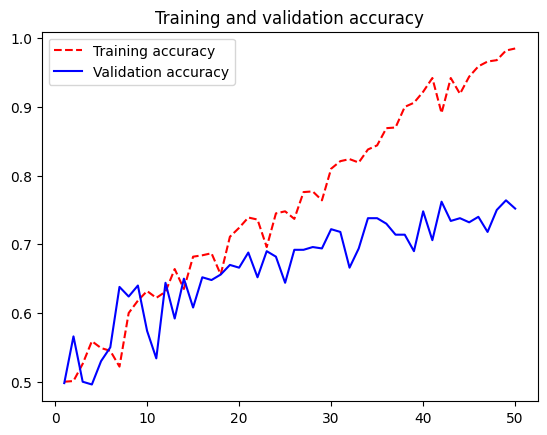

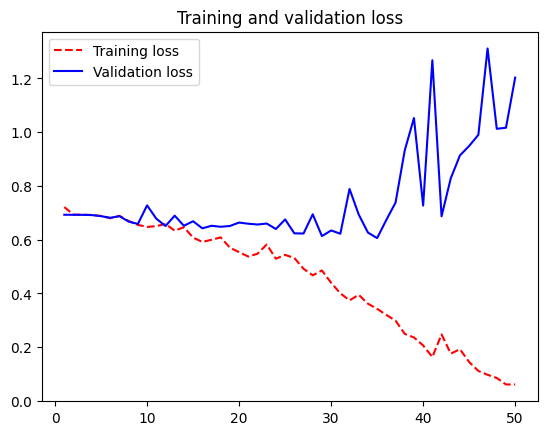

In [26]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "r--", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "r--", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [27]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.7190 - loss: 0.5868
Test accuracy: 0.719


#### Using data augmentation

In [28]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
]

def data_augmentation(images, targets):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images, targets

augmented_train_dataset = train_dataset.map(
    data_augmentation, num_parallel_calls=8
)
augmented_train_dataset = augmented_train_dataset.prefetch(tf.data.AUTOTUNE)

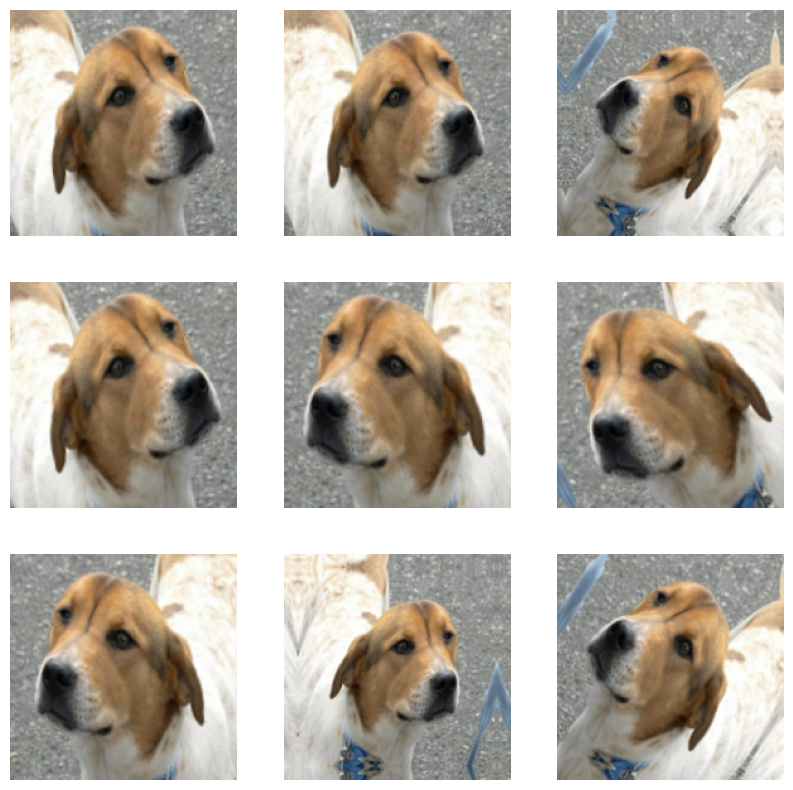

In [29]:
plt.figure(figsize=(10, 10))
for image_batch, _ in train_dataset.take(1):
    image = image_batch[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image, _ = data_augmentation(image, None)
        augmented_image = keras.ops.convert_to_numpy(augmented_image)
        plt.imshow(augmented_image.astype("uint8"))
        plt.axis("off")

In [30]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1.0 / 255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.25)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

In [31]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]
history = model.fit(
    augmented_train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks,
)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 362ms/step - accuracy: 0.4750 - loss: 0.7047 - val_accuracy: 0.5020 - val_loss: 0.6934
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 469ms/step - accuracy: 0.5010 - loss: 0.6936 - val_accuracy: 0.5040 - val_loss: 0.6931
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 374ms/step - accuracy: 0.5050 - loss: 0.6934 - val_accuracy: 0.5160 - val_loss: 0.6929
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 461ms/step - accuracy: 0.4880 - loss: 0.6933 - val_accuracy: 0.5020 - val_loss: 0.6930
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 414ms/step - accuracy: 0.5000 - loss: 0.6922 - val_accuracy: 0.5300 - val_loss: 0.6924
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 376ms/step - accuracy: 0.5350 - loss: 0.6868 - val_accuracy: 0.5240 - val_loss: 0.7024
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 325ms/step - accuracy: 0.5430 - loss: 0.6901 - val_accuracy: 0.5060 - val_loss: 0.6927
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 382ms/step - accuracy: 0.5180 - loss: 0.6926 - val_

In [32]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras"
)
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.7330 - loss: 0.5644
Test accuracy: 0.733


### Using a pretrained model

#### Feature extraction with a pretrained model

In [ ]:
import keras_hub

conv_base = keras_hub.models.Backbone.from_preset("xception_41_imagenet")

In [ ]:
preprocessor = keras_hub.layers.ImageConverter.from_preset(
    "xception_41_imagenet",
    image_size=(180, 180),
)

##### Fast feature extraction without data augmentation

In [ ]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = preprocessor(images)
        features = conv_base.predict(preprocessed_images, verbose=0)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

In [ ]:
train_features.shape

In [ ]:
inputs = keras.Input(shape=(6, 6, 2048))
x = layers.GlobalAveragePooling2D()(inputs)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.25)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]
history = model.fit(
    train_features,
    train_labels,
    epochs=10,
    validation_data=(val_features, val_labels),
    callbacks=callbacks,
)

In [ ]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "r--", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r--", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

##### Feature extraction together with data augmentation

In [ ]:
import keras_hub

conv_base = keras_hub.models.Backbone.from_preset(
    "xception_41_imagenet",
    trainable=False,
)

In [ ]:
conv_base.trainable = True
len(conv_base.trainable_weights)

In [ ]:
conv_base.trainable = False
len(conv_base.trainable_weights)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = preprocessor(inputs)
x = conv_base(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.25)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]
history = model.fit(
    augmented_train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks,
)

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras"
)
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

#### Fine-tuning a pretrained model

In [ ]:
model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    metrics=["accuracy"],
)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]
history = model.fit(
    augmented_train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks,
)

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")